## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta

import yfinance as yf
import seaborn as sns



## Load and Convert DataSet

In [3]:
tck = yf.Ticker("NVDA")
start_Data = "2002-08-1"

df = tck.history(start = start_Data, end = None)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-08-01 00:00:00-04:00,0.085275,0.085275,0.076411,0.076488,1725708000,0.0,0.0
2002-08-02 00:00:00-04:00,0.078933,0.079468,0.069534,0.071445,1795260000,0.0,0.0
2002-08-05 00:00:00-04:00,0.070375,0.070528,0.064873,0.065714,1330716000,0.0,0.0
2002-08-06 00:00:00-04:00,0.068770,0.071750,0.067700,0.069153,1168800000,0.0,0.0
2002-08-07 00:00:00-04:00,0.072209,0.072896,0.064949,0.067548,892980000,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-25 00:00:00-04:00,173.610001,174.720001,172.960007,173.500000,122316800,0.0,0.0
2025-07-28 00:00:00-04:00,174.020004,177.000000,173.970001,176.750000,140023500,0.0,0.0
2025-07-29 00:00:00-04:00,177.960007,179.380005,175.020004,175.509995,154077500,0.0,0.0


In [4]:
col_close = df.pop("Close")
df.insert(0, "Close", col_close)
df.head()

,Close,Open,High,Low,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-08-01 00:00:00-04:00,0.076488,0.085275,0.085275,0.076411,1725708000,0.0,0.0
2002-08-02 00:00:00-04:00,0.071445,0.078933,0.079468,0.069534,1795260000,0.0,0.0
2002-08-05 00:00:00-04:00,0.065714,0.070375,0.070528,0.064873,1330716000,0.0,0.0
2002-08-06 00:00:00-04:00,0.069153,0.068770,0.071750,0.067700,1168800000,0.0,0.0
2002-08-07 00:00:00-04:00,0.067548,0.072209,0.072896,0.064949,892980000,0.0,0.0


In [5]:
df.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [6]:
columns = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]

In [7]:
def check_df(df: object, head: object=5) -> object:
    print("\nShape of data frame")
    print(df.shape)
    print("\nTypes of data frame")
    print(df.dtypes)
    print("\nNaN values")
    print(df.isnull().sum())
    print("\nInfomation of data frame")
    print(df.info())

check_df(df)


Shape of data frame
(5787, 7)

Types of data frame
Close           float64
Open            float64
High            float64
Low             float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

NaN values
Close           0
Open            0
High            0
Low             0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Infomation of data frame
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5787 entries, 2002-08-01 00:00:00-04:00 to 2025-07-31 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         5787 non-null   float64
 1   Open          5787 non-null   float64
 2   High          5787 non-null   float64
 3   Low           5787 non-null   float64
 4   Volume        5787 non-null   int64  
 5   Dividends     5787 non-null   float64
 6   Stock Splits  5787 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 361.7

In [8]:
df["Volume"] = df["Volume"].astype("float64")

In [9]:
#Check the duplicated row
print("Number of duplicated rows: ", len(df[df.duplicated()]))

Number of duplicated rows:  0


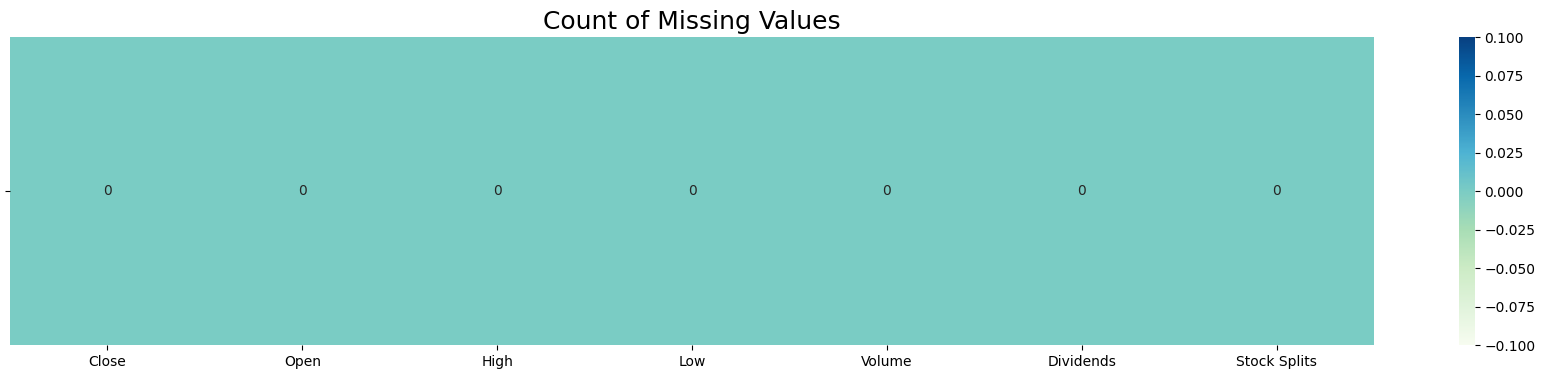

In [10]:
# Count the missing values by columns
plt.figure(figsize = (22, 4))
sns.heatmap((df.isna().sum()).to_frame(name='').T, cmap="GnBu", annot=True, fmt='0.0f').set_title("Count of Missing Values", fontsize = 18)
plt.show()


Không có sự trùng lặp dữ liệu và dữ liệu NaN

##### Bảng thông tin thống kê dữ liệu.

In [11]:
df.describe().T.style.background_gradient(cmap="BuGn", axis=1)

,count,mean,std,min,25%,50%,75%,max
Close,5787.000000,12.512684,30.558365,0.056316,0.297106,0.510505,6.204721,179.270004
Open,5787.000000,12.511614,30.571327,0.055780,0.297088,0.510963,6.215395,182.899994
High,5787.000000,12.735765,31.091194,0.060213,0.302131,0.519903,6.279202,183.300003
Low,5787.000000,12.266009,29.972511,0.055016,0.291815,0.502482,6.131183,176.039993
Volume,5787.000000,571044251.356489,383242762.238562,45644000.000000,340494000.000000,492120000.000000,695253000.000000,9230856000.000000
Dividends,5787.000000,0.000035,0.000423,0.000000,0.000000,0.000000,0.000000,0.010000
Stock Splits,5787.000000,0.003024,0.145325,0.000000,0.000000,0.000000,0.000000,10.000000


In [12]:
# Tim du lieu duy nhat
df.apply(lambda x: len(x.unique()))

Close           4973
Open            5777
High            5772
Low             5770
Volume          5731
Dividends          9
Stock Splits       5
dtype: int64

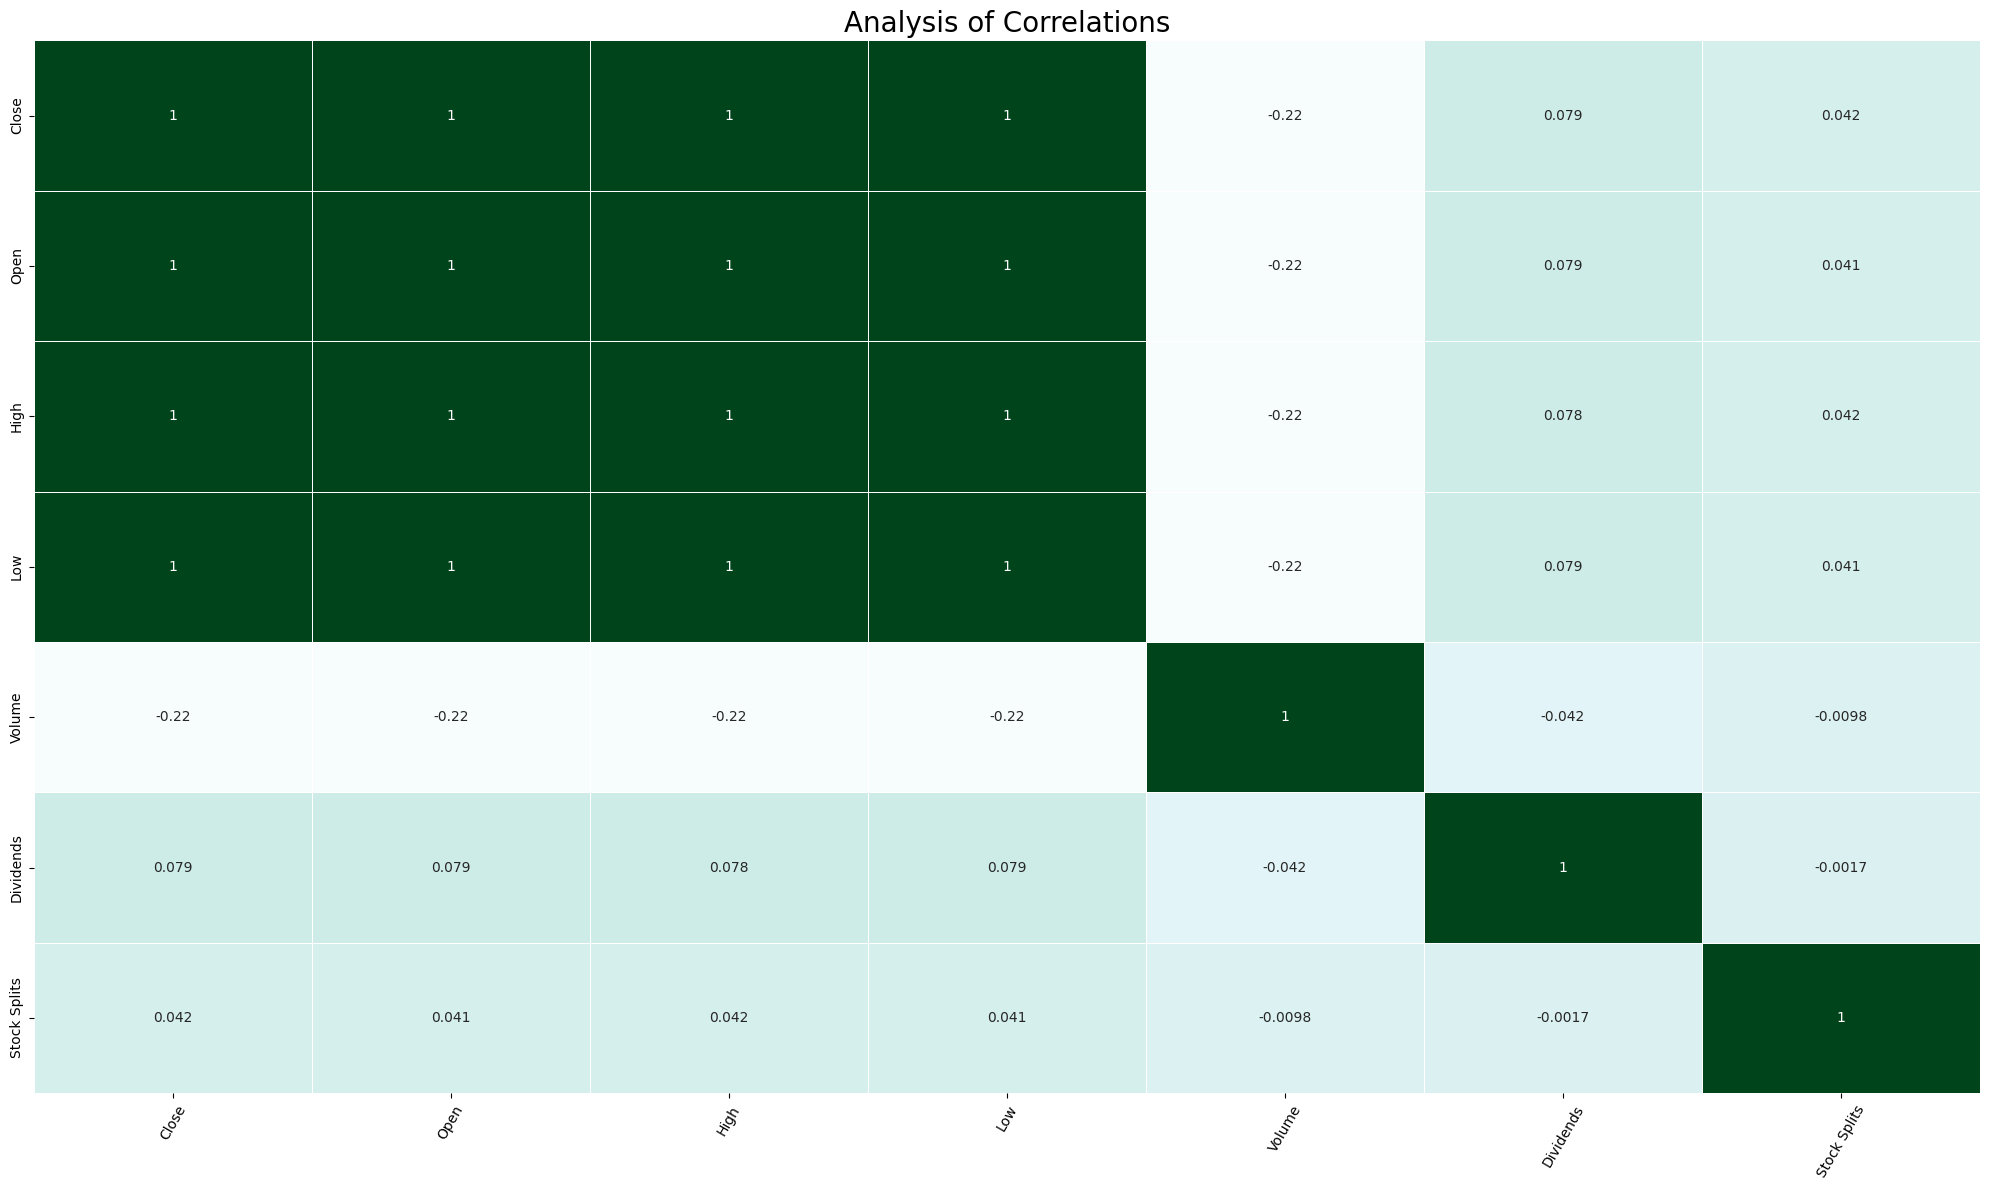

In [13]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(numeric_only=True), cmap="BuGn", annot=True, linewidths=.6, cbar=False)
plt.xticks(rotation = 60, size = 10)
plt.yticks(size=10)
plt.title("Analysis of Correlations", size=20)
plt.tight_layout()
plt.show()

- Tính tương quan giữa các biến giá cổ phiếu (Close, Open, High, Low):
    * Các mối quan hệ tương quan giữa 4 giá trị cổ phiếu này có giá trị bằng 1. Thể hiện một mối tương quan hoàn hảo và tích cực giữa chúng.
    * Các giá cổ phiếu có xu hướng hoạt động cùng chiều một cách chặt chẽ. Điều này được xác định một cách chính xác vì các mức giá này đều được mở bán trong cùng một thời gian giao dịch.
- Tính tương quan giữa các biến (Close, Open, High, Low) với các biến (Volume, Dividends, Stock Splits):
    * Với Volume: Các giá trị tương quan đều là -0.22. Đây là tính tương quan tiêu cực và yếu. Điều này cho thấy có mối liên hệ yếu, khi giá tăng, khối lượng giao dịch có xu hướng giảm một chút, và ngược lại (Mối quan hệ này không mạnh).
    * Với Dividends: Các gia trị tương quan đều nằm ở mức 0.078~0.079. Đây là mức tương quan tích cực và rắt yếu. Mối quan hệ này không có mức ảnh hưởng nhiều đến giá cổ phiếu, cho thấy việc chi trả cổ tức không có mối liên hệ chặt chẽ với sự biến động của giá cổ phiếu.
    * Với Stock Splits: Các giá trị tương quan đều nằm trong mức 0.041~0.042. Đây là mối quan hệ tương quan tích cực và cực kỳ yếu. Việc chia tách cổ phiếu gần như không có mối quan hệ tương quan tuyến tính với sự biến động giá.
-Sự tương quan giữa các biến còn lại (Volume, Dividends, Stock Splits):